In [14]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv

import mne
from mne.datasets import visual_92_categories
from mne.io import concatenate_raws, read_raw_fif

print(__doc__)

data_path = visual_92_categories.data_path()

# Define stimulus - trigger mapping
fname = data_path / "visual_stimuli.csv"
conds = read_csv(fname)
print(conds.head(5))

Automatically created module for IPython interactive environment
   trigger       condition  human  face  animal  natural
0        0  human bodypart      1     0       1        1
1        1  human bodypart      1     0       1        1
2        2  human bodypart      1     0       1        1
3        3  human bodypart      1     0       1        1
4        4  human bodypart      1     0       1        1


In [15]:
max_trigger = 24
conds = conds[:max_trigger]  # take only the first 24 rows

In [16]:
conditions = []
for c in conds.values:
    cond_tags = list(c[:2])
    cond_tags += [
        ("not-" if i == 0 else "") + conds.columns[k] for k, i in enumerate(c[2:], 2)
    ]
    conditions.append("/".join(map(str, cond_tags)))
print(conditions[:10])

['0/human bodypart/human/not-face/animal/natural', '1/human bodypart/human/not-face/animal/natural', '2/human bodypart/human/not-face/animal/natural', '3/human bodypart/human/not-face/animal/natural', '4/human bodypart/human/not-face/animal/natural', '5/human bodypart/human/not-face/animal/natural', '6/human bodypart/human/not-face/animal/natural', '7/human bodypart/human/not-face/animal/natural', '8/human bodypart/human/not-face/animal/natural', '9/human bodypart/human/not-face/animal/natural']


In [17]:
event_id = dict(zip(conditions, conds.trigger + 1))
event_id["2/human bodypart/human/not-face/animal/natural"]

3

In [18]:
n_runs = 4  # 4 for full data (use less to speed up computations)
fnames = [data_path / f"sample_subject_{b}_tsss_mc.fif" for b in range(n_runs)]
raws = [
    read_raw_fif(fname, verbose="error", on_split_missing="ignore") for fname in fnames
]  # ignore filename warnings
raw = concatenate_raws(raws)

events = mne.find_events(raw, min_duration=0.002)

events = events[events[:, 2] <= max_trigger]

4142 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]


In [19]:
picks = mne.pick_types(raw.info, meg=True)
epochs = mne.Epochs(
    raw,
    events=events,
    event_id=event_id,
    baseline=None,
    picks=picks,
    tmin=-0.1,
    tmax=0.400,
    preload=True,
)

Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Loading data for 720 events and 501 original time points ...
0 bad epochs dropped


Using matplotlib as 2D backend.


/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_10723/2622419065.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs["face"].plot()


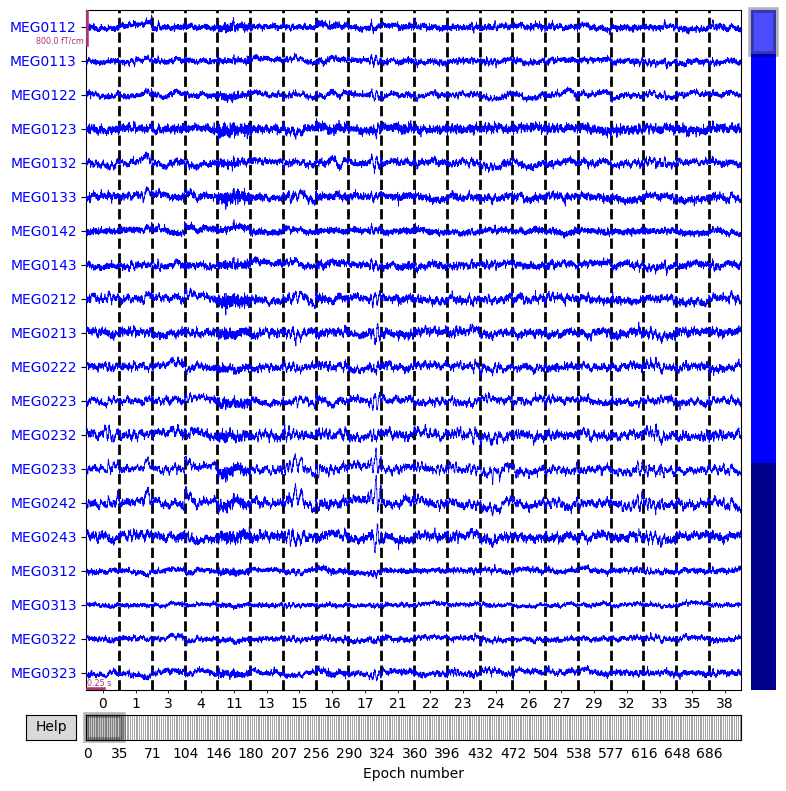

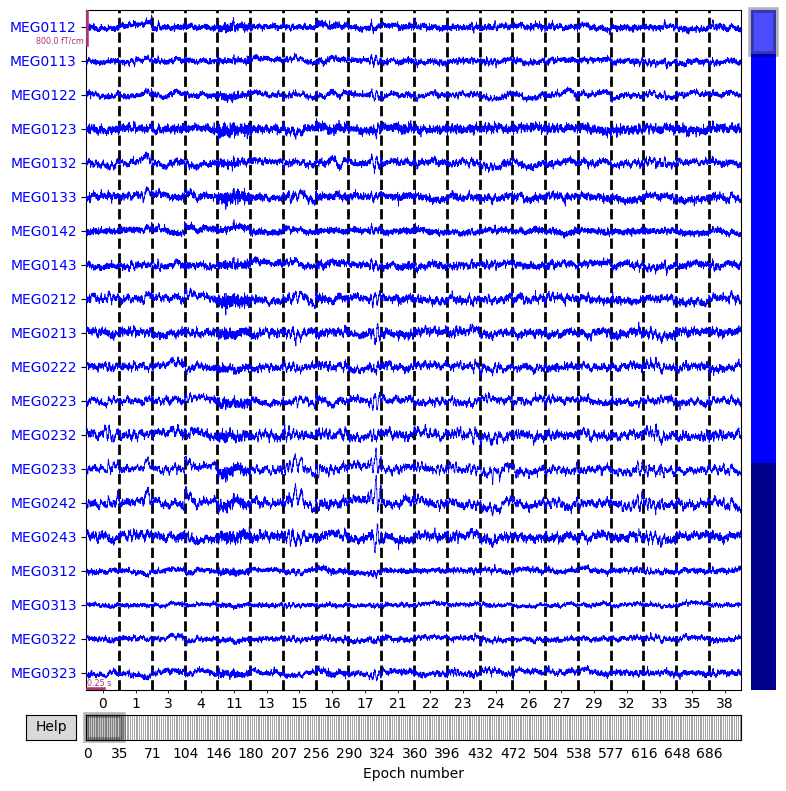

In [20]:
epochs["face"].plot()


/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_10723/2769995739.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs["not-face"].plot()


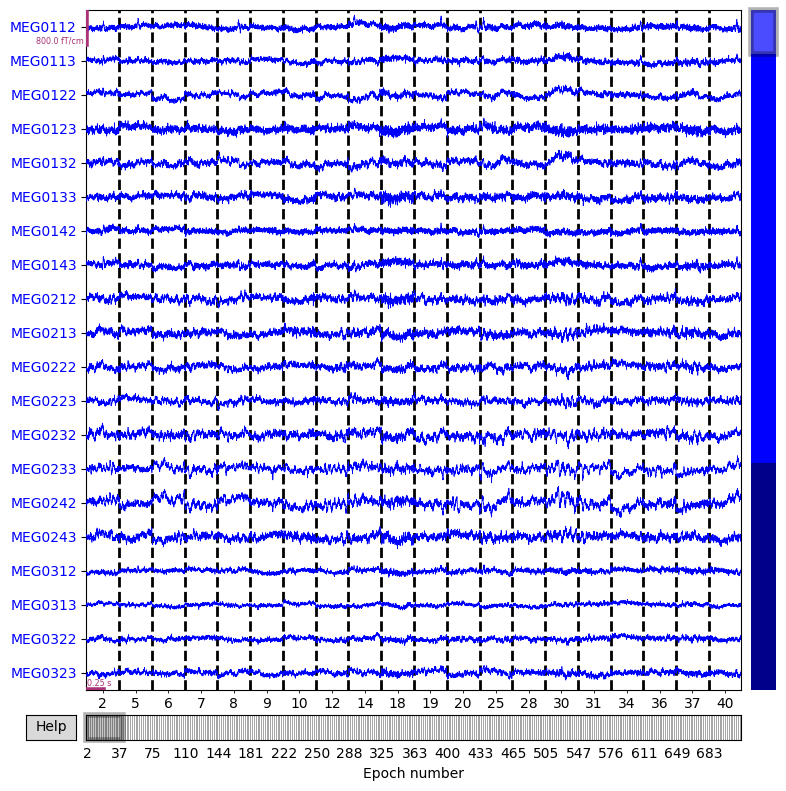

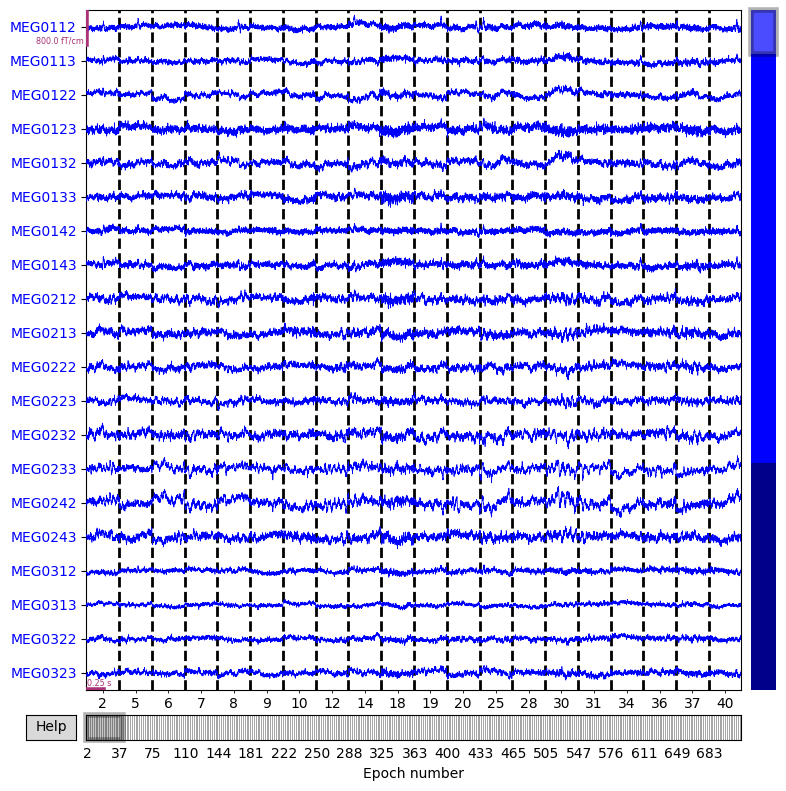

In [21]:
epochs["not-face"].plot()


In [22]:
epochs.get_data().shape

(720, 306, 501)

In [23]:
epochs["2/human bodypart/human/not-face/animal/natural"].get_data().shape

(30, 306, 501)

In [24]:
event_id

{'0/human bodypart/human/not-face/animal/natural': 1,
 '1/human bodypart/human/not-face/animal/natural': 2,
 '2/human bodypart/human/not-face/animal/natural': 3,
 '3/human bodypart/human/not-face/animal/natural': 4,
 '4/human bodypart/human/not-face/animal/natural': 5,
 '5/human bodypart/human/not-face/animal/natural': 6,
 '6/human bodypart/human/not-face/animal/natural': 7,
 '7/human bodypart/human/not-face/animal/natural': 8,
 '8/human bodypart/human/not-face/animal/natural': 9,
 '9/human bodypart/human/not-face/animal/natural': 10,
 '10/human bodypart/human/not-face/animal/natural': 11,
 '11/human bodypart/human/not-face/animal/natural': 12,
 '12/human face/human/face/animal/natural': 13,
 '13/human face/human/face/animal/natural': 14,
 '14/human face/human/face/animal/natural': 15,
 '15/human face/human/face/animal/natural': 16,
 '16/human face/human/face/animal/natural': 17,
 '17/human face/human/face/animal/natural': 18,
 '18/human face/human/face/animal/natural': 19,
 '19/human 

In [25]:
evoked = [epochs[k].average().get_data() for k in event_id]
evoked = np.array(evoked)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [26]:
evoked.shape

(24, 306, 501)

In [27]:
from scipy.stats import pearsonr

def round_to_zero_if_close(value):
    """
    Rounds a float value to zero if it's close enough (within 1e-15).

    Args:
        value (float): The float value to round to zero.

    Returns:
        float: The original value rounded to zero if it's close enough, otherwise the original value.
    """
    if abs(value) < 1e-15:
        return 0
    return value

def calculate_rdm(activity, num_conditions, calculate_absolute=False):
    """
    Calculates the Representational Dissimilarity Matrix (RDM) for one Artificial Neural Network layer
    activations or for a brain region.

    Args:
        activity (np.ndarray): The model layer/brain region activity patterns.

    Returns:
        np.ndarray: The activations RDM. The shape is [num_conditions, num_conditions].
    """
    rdm = np.zeros((num_conditions, num_conditions), dtype=np.float64)

    for i in range(num_conditions):
        for j in range(i + 1, num_conditions):
            r = pearsonr(activity[i], activity[j])[0]
            value = 1 - np.abs(r) if calculate_absolute else 1 - r
            rdm[i, j] = round_to_zero_if_close(value)

    return rdm

In [28]:
from typing import Dict
from tqdm import tqdm
def brain_rdm_movie(brain_activity: Dict[str, np.ndarray], num_conditions: int, t_start: int = 0, t_end: int = 501) -> np.ndarray:
    """
    Compute a movie of Representational Dissimilarity Matrices (RDMs) for brain activity over time.

    This function calculates a sequence of RDMs over time from the brain activity data provided.
    Each RDM in the movie represents the dissimilarity between conditions at a specific time point.

    Args:
        brain_activity (dict): A dictionary containing the brain regions/sensors activity patterns.
        t_start (int, optional): The starting time point for the RDM movie, default is 0.
        t_end (int, optional): The ending time point for the RDM movie, default is 501.

    Returns:
        np.ndarray: A 4D array representing the RDM movie. Shape: [num_brain_elements, rdm_movie_length, num_conditions, num_conditions].

    Note:
    - The function computes RDMs over a specified time range for each brain element in the input data.
    - The resulting RDM movie captures temporal changes in dissimilarity patterns between conditions.
    """
    rdm_movie_length = t_end - t_start
    num_brain_elements = len(brain_activity)
    rdms = np.zeros((num_brain_elements, rdm_movie_length, num_conditions, num_conditions), dtype=np.float64)
    for brain_element_id, (_, brain_element_activity) in tqdm(enumerate(brain_activity.items()), desc="Calculating brain RDMs movie", total=num_brain_elements):
        for t in range(rdm_movie_length):
            segment_activity = brain_element_activity[:, :, t_start + t]
            rdms[brain_element_id, t] = calculate_rdm(segment_activity, num_conditions)

    return rdms

In [29]:
brain_activity = {"brain": evoked}
num_conditions = len(event_id)
rdm_movie = brain_rdm_movie(brain_activity, num_conditions)

Calculating brain RDMs movie: 100%|██████████| 1/1 [00:50<00:00, 50.69s/it]


In [30]:
rdm_movie.shape

(1, 501, 24, 24)

In [31]:
rdm_movie = rdm_movie[0]

In [32]:
rdm_movie.shape

(501, 24, 24)

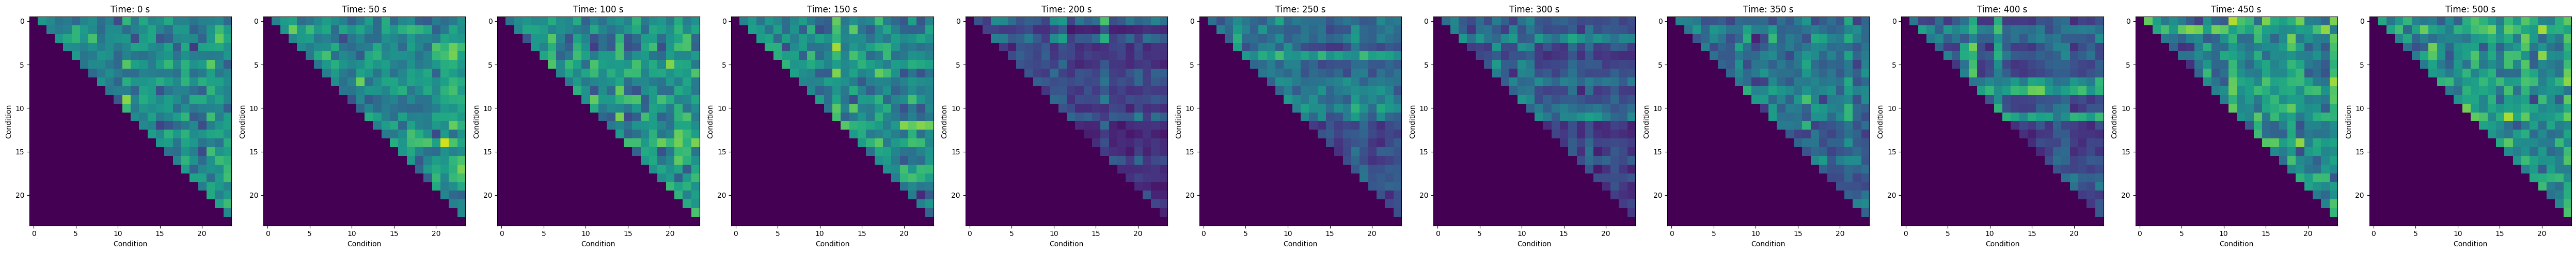

In [33]:
import numpy as np
import matplotlib.pyplot as plt

time_interval = 50
num_timepoints = rdm_movie.shape[0]
total_time = num_timepoints 

indices = np.arange(0, total_time, time_interval)

num_plots = len(indices)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(50, 5))

for i, idx in enumerate(indices):
    ax = axes[i]
    ax.imshow(rdm_movie[idx], cmap='viridis', vmin=0, vmax=np.max(rdm_movie), aspect='auto')
    ax.set_title(f'Time: {idx} s')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Condition')

plt.tight_layout()
plt.show()


In [34]:
import numpy as np
import pandas as pd

stimuli = {
    '0/human bodypart/human/not-face/animal/natural': 1,
    '1/human bodypart/human/not-face/animal/natural': 2,
    '2/human bodypart/human/not-face/animal/natural': 3,
    '3/human bodypart/human/not-face/animal/natural': 4,
    '4/human bodypart/human/not-face/animal/natural': 5,
    '5/human bodypart/human/not-face/animal/natural': 6,
    '6/human bodypart/human/not-face/animal/natural': 7,
    '7/human bodypart/human/not-face/animal/natural': 8,
    '8/human bodypart/human/not-face/animal/natural': 9,
    '9/human bodypart/human/not-face/animal/natural': 10,
    '10/human bodypart/human/not-face/animal/natural': 11,
    '11/human bodypart/human/not-face/animal/natural': 12,
    '12/human face/human/face/animal/natural': 13,
    '13/human face/human/face/animal/natural': 14,
    '14/human face/human/face/animal/natural': 15,
    '15/human face/human/face/animal/natural': 16,
    '16/human face/human/face/animal/natural': 17,
    '17/human face/human/face/animal/natural': 18,
    '18/human face/human/face/animal/natural': 19,
    '19/human face/human/face/animal/natural': 20,
    '20/human face/human/face/animal/natural': 21,
    '21/human face/human/face/animal/natural': 22,
    '22/human face/human/face/animal/natural': 23,
    '23/human face/human/face/animal/natural': 24
}

stimuli_df = pd.DataFrame(list(stimuli.items()), columns=['stimulus', 'id'])

num_stimuli = len(stimuli)
rdm_faces = np.zeros((num_stimuli, num_stimuli))
rdm_animate = np.zeros((num_stimuli, num_stimuli))

face_indices = [i for i in range(num_stimuli) if 'human face' in stimuli_df['stimulus'][i]]
non_face_indices = [i for i in range(num_stimuli) if 'not-face' in stimuli_df['stimulus'][i]]

animate_indices = [i for i in range(num_stimuli) if 'animal' in stimuli_df['stimulus'][i]]
non_animate_indices = [i for i in range(num_stimuli) if 'not-face' in stimuli_df['stimulus'][i]]

for i in range(num_stimuli):
    for j in range(num_stimuli):
        if i == j:
            rdm_faces[i, j] = 0  
            rdm_animate[i, j] = 0
        else:
            # Dissimilarity for face vs. non-face
            if (i in face_indices and j in face_indices) or (i in non_face_indices and j in non_face_indices):
                rdm_faces[i, j] = 1  # Similar
            else:
                rdm_faces[i, j] = 2  # Dissimilar

            # Dissimilarity for animate vs. non-animate
            if (i in animate_indices and j in animate_indices) or (i in non_animate_indices and j in non_animate_indices):
                rdm_animate[i, j] = 1  # Similar
            else:
                rdm_animate[i, j] = 2  # Dissimilar

print("RDM for Faces vs Non-Faces:\n", rdm_faces)
print("RDM for Animate vs Non-Animate:\n", rdm_animate)


RDM for Faces vs Non-Faces:
 [[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

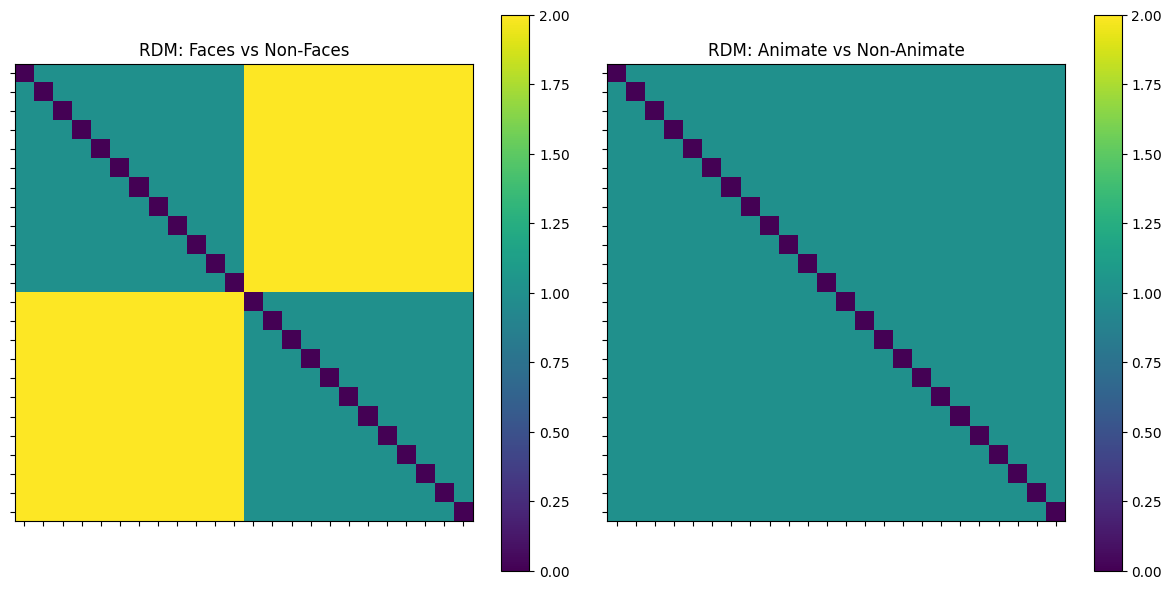

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# RDM for Faces vs Non-Faces
cax1 = axs[0].imshow(rdm_faces, cmap='viridis', vmin=0, vmax=2)
axs[0].set_title('RDM: Faces vs Non-Faces')
axs[0].set_xticks(np.arange(num_stimuli))
axs[0].set_yticks(np.arange(num_stimuli))
axs[0].set_xticklabels([], rotation=90)
axs[0].set_yticklabels([])
fig.colorbar(cax1, ax=axs[0])

# RDM for Animate vs Non-Animate
cax2 = axs[1].imshow(rdm_animate, cmap='viridis', vmin=0, vmax=2)
axs[1].set_title('RDM: Animate vs Non-Animate')
axs[1].set_xticks(np.arange(num_stimuli))
axs[1].set_yticks(np.arange(num_stimuli))
axs[1].set_xticklabels([], rotation=90)
axs[1].set_yticklabels([])
fig.colorbar(cax2, ax=axs[1])

plt.tight_layout()
plt.show()


In [36]:
def calculate_rsa(rdm1_vector: np.array, rdm2_vector: np.array, permutation: bool, iter: int = 1000) -> np.array:
    """
    Compute the similarity between two RDMs.

    Args:
        rdm1_vector (np.array): The first RDM.
        rdm2_vector (np.array): The second RDM.
        permutation (bool): Whether to use permutation tests or not.

    Returns:
        rp (np.array): The similarity measure and p-value.

    """
    if len(rdm1_vector) != len(rdm2_vector):
        raise ValueError("The two RDMs must have the same length.")
    rp = np.array(pearsonr(rdm1_vector, rdm2_vector))


    return rp


In [40]:
def _get_rdm_vectors( rdms: np.array) -> np.array:
    """
    Transform 2D RDMs into 1D vectors using the upper triangle.

    Args:
        rdms (np.array): The RDMs. Shape: [num_rdms, num_conditions, num_conditions].

    Returns:
        rdm_vectors (np.array): The RDM vectors. Shape: [num_rdms, num_conditions * (num_conditions - 1) / 2].

    """
    num_rdms = rdms.shape[0]
    num_conditions = rdms.shape[-1]
    rdm_vectors = np.zeros((num_rdms, int(num_conditions * (num_conditions - 1) / 2)))
    for i in range(num_rdms):
        rdm_vectors[i] = rdms[i][np.triu_indices(num_conditions, k=1)]
    return rdm_vectors

def rsa( meg_rdm: np.array, model_rdm: np.array, permutation: bool = False, iter: int = 1000) -> np.array:
    """
    Compute the similarity between MEG RDMs and model RDMs.

    Args:
        meg_rdm (np.array): A 4D MEG RDM movie. Shape: [num_brain_elements, num_rdms, num_conditions, num_conditions].
        model_rdm (np.array): The model RDMs. Shape: [num_layers, num_conditions, num_conditions]
        permutation (bool): Whether to use permutation tests or not.

    Returns:
        similarity (np.array): The similarity measure and p-value. Shape: [num_brain_elements, num_rdms, num_layers, 2].

    """
    if meg_rdm.shape[2] != model_rdm.shape[1]:
        raise ValueError("The two RDMs must have the same length.")


    num_brain_elements = meg_rdm.shape[0]
    rdm_length = meg_rdm.shape[1]
    num_layers = model_rdm.shape[0]
    meg_rdm_vector = np.zeros((num_brain_elements, rdm_length, int(meg_rdm.shape[-1] * (meg_rdm.shape[-1] - 1) / 2)))
    for i in range(num_brain_elements):
        meg_rdm_vector[i] =  _get_rdm_vectors(meg_rdm[i])
    model_rdm_vector = _get_rdm_vectors(model_rdm) 
    del meg_rdm, model_rdm
    similarity = np.zeros((num_brain_elements, rdm_length, num_layers, 2))

    for i in tqdm(range(num_brain_elements), desc="Computing RSA"):
        for j in range(rdm_length):
            for k in range(num_layers):
                similarity[i, j, k] = calculate_rsa(meg_rdm_vector[i, j], model_rdm_vector[k], permutation)
    return similarity

def score( meg_rdm: np.array, model_rdm: np.array, parrallel: bool = True, permutation: bool = False, iter: int = 1000) -> np.array:
    """
    Compute the similarity between MEG RDMs and model RDMs.

    Args:
        meg_rdm (np.array): A 4D MEG RDM movie. Shape: [num_brain_elements, num_rdms, num_conditions, num_conditions].
        model_rdm (np.array): The model RDMs. Shape: [num_layers, num_conditions, num_conditions]
        parrallel (bool): Whether to use parallel computation or not.
        permutation (bool): Whether to use permutation tests or not.
        iter (int): The number of iterations for permutation tests.

    Returns:
        similarity (np.array): The similarity measure and p-value. Shape: [num_brain_elements, num_rdms, num_layers, 2].

    """
    return rsa(meg_rdm, model_rdm, permutation, iter)



In [44]:
rdm_faces = np.reshape(rdm_faces, (1, 24, 24))


In [49]:
rdm_movie = np.reshape(rdm_movie, (1, 501, 24, 24))

In [50]:
similarity=score(rdm_movie, rdm_faces)

Computing RSA: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


In [52]:
similarity.shape

(1, 501, 1, 2)

In [55]:
similarity_values = similarity[0, :, 0, 0]

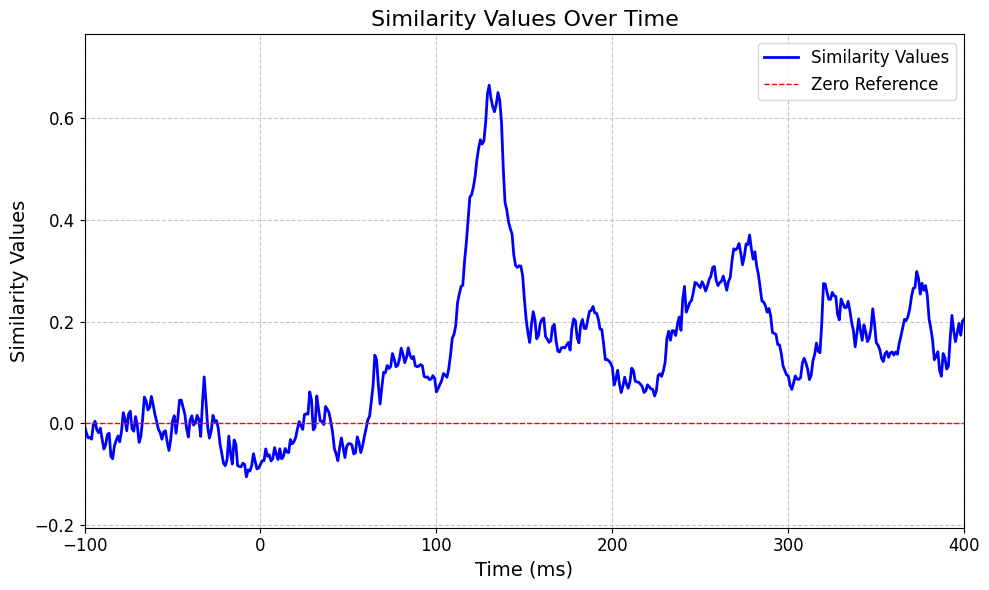

In [56]:
# Define the time range from -100 ms to 400 ms
time = np.linspace(-100, 400, num=501)  # Creates an array of 501 values from -100 to 400

# Create the plot
plt.figure(figsize=(10, 6))

# Plot with improved aesthetics
plt.plot(time, similarity_values, color='blue', linewidth=2, label='Similarity Values')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Reference')

# Adding titles and labels
plt.title('Similarity Values Over Time', fontsize=16)
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Similarity Values', fontsize=14)

# Customizing ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Setting limits
plt.xlim(-100, 400)
plt.ylim(min(similarity_values) - 0.1, max(similarity_values) + 0.1)

# Adding a legend
plt.legend(fontsize=12)

# Saving the figure in a high-resolution format
plt.tight_layout()
plt.savefig('similarity_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with high DPI

# Show the plot
plt.show()

In [2]:
import torch
from torchvision import models

# Load the pretrained AlexNet model
alexnet = models.alexnet(pretrained=True)

# Set the model to evaluation mode
alexnet.eval()

# If you want to move the model to GPU (if available)
if torch.cuda.is_available():
    alexnet = alexnet.to('cuda')

# Now you can use alexnet for inference or further fine-tuning


/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import torch
import torch.nn as nn
import torch.nn.modules as mod

# Global variable to store activations
activations = {}

def get_activation_hook(name: str):
    """
    Create a hook to capture the activation of a specific layer in the network.

    Parameters:
        name (str): A name to identify the activation tensor in the activations dictionary.

    Returns:
        Callable: A hook function that can be registered to capture activations.
    """
    def hook(module, input, output):
        """
        Hook function to capture the activation tensor.

        This function detaches the tensor from the computation graph, converts it to a NumPy array,
        and reshapes it for further analysis.

        Parameters:
            module (torch.nn.Module): The layer to which the hook is attached.
            input (tuple): Input tensors to the layer.
            output (torch.Tensor): The output tensor of the layer.

        Returns:
            None
        """
        # Detach the tensor from the computation graph, convert to NumPy, and reshape
        activation = output.detach().cpu().numpy().reshape(output.size(0), -1)
        activations[name] = activation

    return hook

from typing import Union,  Dict

def model_activations(model: nn.Module,
    data: torch.Tensor,
    weights: Union[str, None] = None,
    file_name: Union[str, None] = None,
    transfer: bool = False
) -> dict:
    """
    Get a dictionary with the activations of selected layers for a given input tensor.

    Args:
        model (nn.Module): The neural network architecture.
        data (torch.Tensor): The input tensor to the network.
        weights (str): The path to the trained model weights. If set to None, the model will use random weights.
        file_name (str, optional): The name of the file to save the activations to.
            This parameter is only used if 'save' is set to True.
        transfer (bool, optional): Indicates whether transfer first layer.

    Returns:
        dict: A dictionary with layer names as keys and their activations as values.
              Each activation value is a numpy array of shape [n_cons, N_neurons_in_layer], where 'n_cons' is the
              number of examples in the input tensor, and 'N_neurons_in_layer' is the number of neurons in the
              corresponding layer.
    """

    model.eval()
    activations.clear()  # Clear previous activations

    # Register hooks for selected layer types
    for name, layer in model.named_modules():
        layer.register_forward_hook(get_activation_hook(name))

    with torch.no_grad():
        output = model(data)

    return activations
